In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [20]:
for i in range(25):
    nullCheck = df.iloc[:,i].isnull().sum()
    print("The number of null value in column ",i," are: ",nullCheck)

The number of null value in column  0  are:  0
The number of null value in column  1  are:  0
The number of null value in column  2  are:  0
The number of null value in column  3  are:  0
The number of null value in column  4  are:  0
The number of null value in column  5  are:  0
The number of null value in column  6  are:  0
The number of null value in column  7  are:  0
The number of null value in column  8  are:  0
The number of null value in column  9  are:  0
The number of null value in column  10  are:  0
The number of null value in column  11  are:  0
The number of null value in column  12  are:  0
The number of null value in column  13  are:  0
The number of null value in column  14  are:  0
The number of null value in column  15  are:  0
The number of null value in column  16  are:  0
The number of null value in column  17  are:  0
The number of null value in column  18  are:  0
The number of null value in column  19  are:  0
The number of null value in column  20  are:  0
Th

In [22]:
Y = df['default.payment.next.month']
Y


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default.payment.next.month, Length: 30000, dtype: int64

In [24]:
X = df.drop(['ID','default.payment.next.month'],axis='columns')
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.iloc[:,12:24] = scaler.fit_transform(X.iloc[:,12:24])
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,120000.0,2,2,2,26,-1,2,0,0,0,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,90000.0,2,2,2,34,0,0,0,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,50000.0,2,2,1,37,0,0,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=10)

In [76]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
4762,30000.0,2,2,1,22,2,0,0,0,0,...,-0.273203,-0.232062,-0.186318,-0.404727,-0.221191,-0.191887,-0.240005,-0.256996,-0.266486,-0.237130
26106,450000.0,2,1,1,49,1,-1,-1,-1,-1,...,-0.677929,-0.633932,-0.437452,-0.323875,-0.308312,-0.256990,-0.155889,0.567470,0.150583,-0.247705
16205,80000.0,2,3,1,41,0,0,-1,0,-1,...,-0.655953,-0.626703,-0.638830,-0.652724,-0.281566,-0.190845,-0.213140,-0.214037,-0.314136,-0.271444
26722,180000.0,1,1,2,26,-1,-1,-2,-1,0,...,-0.718463,1.299840,1.459116,1.558881,-0.341942,-0.256990,7.169291,-0.039390,-0.029414,-0.062805
12398,400000.0,2,1,2,29,1,2,0,0,0,...,0.358392,0.448830,0.536935,0.631289,-0.341942,-0.118104,-0.140610,-0.116564,0.065493,-0.135877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,240000.0,2,2,2,27,0,-1,0,-1,0,...,-0.624459,-0.350821,-0.337857,-0.004513,-0.206761,-0.096403,0.881105,0.330458,2.311526,0.199160
17728,50000.0,2,2,1,51,0,0,2,2,3,...,-0.000406,0.112247,0.166007,0.190909,-0.093798,-0.256990,-0.035537,-0.244230,-0.183229,-0.293382
29199,10000.0,1,2,2,27,0,0,0,0,0,...,-0.572158,-0.532209,-0.533346,-0.511976,-0.275106,-0.200133,-0.183208,-0.290892,-0.248683,-0.231505
7293,100000.0,2,2,1,27,-2,-2,-2,-2,-2,...,-0.677929,-0.672497,-0.663059,-0.652724,-0.053347,-0.256990,-0.296801,-0.308063,-0.314136,-0.293382


In [78]:
X_test

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20412,160000.0,1,1,2,26,-1,-1,-1,-1,-1,...,-0.458846,-0.503918,0.100098,-0.109780,0.571782,0.402675,0.319159,2.653593,-0.230356,0.550397
1296,50000.0,1,2,2,29,1,2,2,2,0,...,-0.103105,-0.067446,-0.009333,0.027895,-0.341942,-0.061681,-0.296801,-0.205930,-0.209411,-0.203379
3906,380000.0,2,1,1,33,0,0,0,0,0,...,2.442540,2.642489,2.682170,2.454687,-0.059565,5.408386,0.135365,0.457932,0.144038,0.044129
20454,400000.0,1,1,2,26,0,0,0,0,0,...,1.652124,1.598433,1.459560,0.613826,0.141425,5.111474,0.100889,0.213261,-0.052584,-0.180878
5200,60000.0,2,1,2,34,0,0,0,0,0,...,-0.085455,-0.275835,-0.230860,-0.199146,-0.210444,-0.191409,-0.228645,-0.225080,-0.229047,-0.222955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28631,120000.0,2,2,1,41,-1,-1,-1,-1,-1,...,-0.671858,-0.602516,-0.564154,-0.567187,0.153681,-0.238717,-0.012818,0.075765,-0.314136,0.134133
721,10000.0,1,2,2,22,0,0,0,0,0,...,-0.555099,-0.538380,-0.510203,-0.568211,-0.221191,-0.213588,-0.268403,-0.212313,-0.314136,-0.152752
19990,150000.0,2,2,1,32,-1,2,-1,0,0,...,-0.253621,-0.199372,-0.151135,-0.165814,-0.341942,1.020110,-0.183208,-0.210526,-0.214778,-0.180878
14710,150000.0,2,2,2,33,-2,-2,-2,-2,-2,...,-0.677929,-0.664725,-0.656496,-0.652724,-0.174158,-0.256990,-0.268403,-0.282593,-0.314136,-0.293382


In [80]:
Y_train

4762     1
26106    0
16205    0
26722    0
12398    0
        ..
28017    0
17728    0
29199    0
7293     0
17673    0
Name: default.payment.next.month, Length: 24000, dtype: int64

In [82]:
Y_test

20412    0
1296     0
3906     0
20454    0
5200     1
        ..
28631    0
721      1
19990    0
14710    0
10011    0
Name: default.payment.next.month, Length: 6000, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_predict = lr.predict(X_test)
print(" predicted value of Y")
print(Y_predict[:])
print(" test values of Y ")
print(np.array(Y_test[:]))
print("The Accuracy of the Logistic Regression is ")
print(lr.score(X_test,Y_test))

 predicted value of Y
[0 0 0 ... 0 0 0]
 test values of Y 
[0 0 0 ... 0 0 0]
The Accuracy of the Logistic Regression is 
0.8096666666666666


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

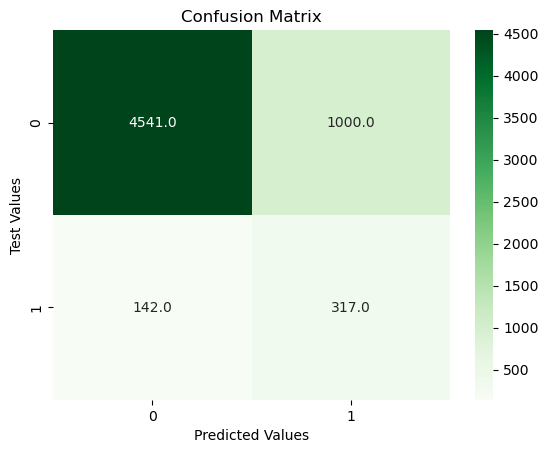

In [114]:
from sklearn import metrics
matrix = metrics.confusion_matrix(Y_predict,Y_test)
sns.heatmap(matrix,annot=True,cmap='Greens',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")      
plt.title("Confusion Matrix")

In [118]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_predict = nb.predict(X_test)
print("predicted value of Y")
print(Y_predict[:])
print("test values of Y ")
print(np.array(Y_test[:]))
print("The Accuracy of the Naive Bayes is ")
print(nb.score(X_test,Y_test))

predicted value of Y
[0 0 0 ... 0 0 0]
test values of Y 
[0 0 0 ... 0 0 0]
The Accuracy of the Naive Bayes is 
0.7828333333333334


Text(0.5, 1.0, 'Confusion Matrix')

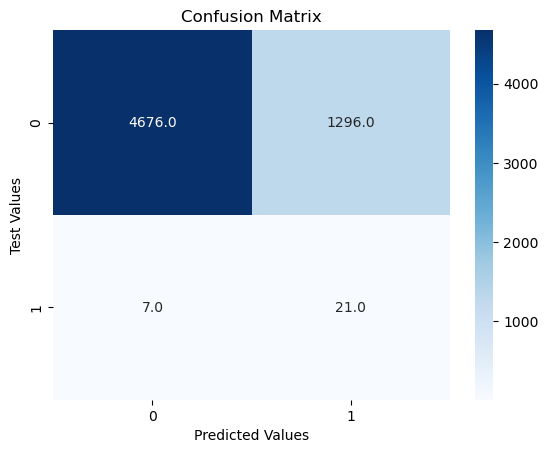

In [120]:
matrix = metrics.confusion_matrix(Y_predict,Y_test)
sns.heatmap(matrix,annot=True,cmap='Blues',fmt='0.1f')
plt.xlabel("Predicted Values")
plt.ylabel("Test Values")      
plt.title("Confusion Matrix")

In [128]:
from sklearn.model_selection import cross_val_score
lr.fit(X,Y)
print(cross_val_score(lr,X,Y,cv=10))
print(np.average(cross_val_score(lr,X,Y,cv=10)))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.79666667 0.80233333 0.80633333 0.804      0.802      0.81233333
 0.82066667 0.81366667 0.80433333 0.811     ]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8073333333333335


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
nb.fit(X,Y)
print(cross_val_score(nb,X,Y,cv=10))
print(np.average(cross_val_score(nb,X,Y,cv=10)))

[0.78       0.77866667 0.77966667 0.77866667 0.78166667 0.78133333
 0.78       0.78       0.77933333 0.782     ]
0.7801333333333333
